# Proyecto EDO Equipo 15

## Integrantes

- Alejandro Camacho Pérez       C-212
- Carlos Arturo Pérez Cabrera   C-212
- Diana Laura Pérez Trujillo    C-212
- David Sánchez Iglesias        C-212

## Ejercicios

Todos los ejercicios son utilizando el libro de Edwards

### Métodos y variables globales

In [1]:
from matplotlib import pyplot as pl

EPSILON = 1e-8


def Great_Than(a, b):
    return (not Equal_To(a, b)) and (a - b > 0)


def Less_Than(a, b):
    return (not Equal_To(a, b)) and (a - b < 0)


def Equal_To(a, b):
    return abs(a - b) < EPSILON


def Euler_Method(function, x, y, max, h):

    coordinates = ([], [])
    initial = True

    while(Less_Than(x, max) or Equal_To(x, max)):

        # Save values
        if(initial):
            initial = False
        else:
            coordinates[0].append(x)
            coordinates[1].append(y)

        # Update y value
        y = y+h*function(x, y)

        # Update x value
        x = x+h

    return coordinates


def Euler_Method_Improved(function, x, y, max, h):

    coordinates = ([], [])

    initial = True

    while(Less_Than(x, max) or Equal_To(x, max)):

        # Save values
        if(initial):
            initial = False
        else:
            coordinates[0].append(x)
            coordinates[1].append(y)

        # Calculate first slope
        k1 = function(x, y)

        u = y+h*k1

        # Update x value
        x = x+h

        # Calculate second slope
        k2 = function(x, u)

        # Update y value
        y = y+h*(1/2)*(k1+k2)

    return coordinates


def Runge_Kutta_Method(function, x, y, max, h):

    coordinates = ([], [])

    initial = True

    while(Less_Than(x, max) or Equal_To(x, max)):

        # Save values
        if(initial):
            initial = False
        else:
            coordinates[0].append(x)
            coordinates[1].append(y)

        # Calculate first slope
        k1 = function(x, y)

        u = y+h*(1/2)*k1

        # Calculate second slope
        k2 = function(x+h/2, u)

        u = y+h*(1/2)*k2

        # Calculate third slope
        k3 = function(x+h/2, u)

        u = y+h*k3

        # Calculate fourth slope
        k4 = function(x+h, u)

        # Update y value
        y = y+h*(1/6)*(k1+2*k2+2*k3+k4)

        # Update x value
        x = x+h

    return coordinates



### Ejercicio 24, página 132

Para el problema se requiere una computadora con
impresora. En este problema de valor inicial utilice el método de Euler mejorado con tamaños de paso h = 0.1, 0.02,
0.004 y 0.0008 para aproximar con 5 cifras decimales el valor
de la solución en 10 puntos igualmente espaciados del intervalo dado. Imprima los resultados en forma tabular con los encabezados apropiados para facilitar la comparación del efecto
de variar el tamaño de paso h. Las primas representan derivadas con respecto a x.

 - $y'= \frac{x}{1+y²},y(-1)=1;-1 \leq x \leq 1$

#### Código

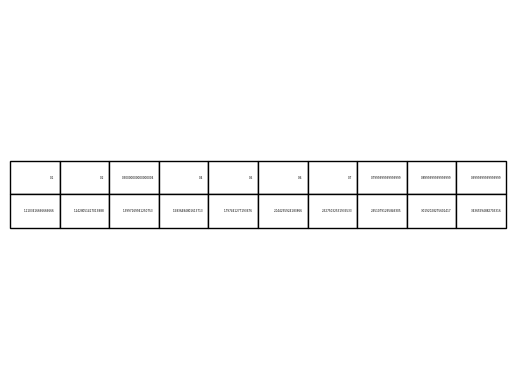

### Ejercicio 24, Página 142

Para el problema se requiere una computadora con
impresora. En estos problemas de valor inicial utilice el méto-
do de Runge-Kutta con tamaños de paso h = 0.2 , 01, 0.05 y
0.025 para aproximar a 6 cifras decimales los valores de la
solución en 5 puntos igualmente espaciados del intervalo
dado. Imprima los resultados en forma tabular con un enca-
bezado apropiado que facilite la comparación del efecto de
variar el tamaño de paso h. Las primas representan derivadas
con respecto a x.

 - $y'= \frac{x}{1+y²},y(-1)=1;-1 \leq x \leq 1$

#### Código

### Ejercicio 26, página 132

Suponga que
en un pequeño bosque la población de venados P(t) inicialmente es de 25 individuos y satisface la ecuación
logística  

- $\frac{dP}{dt} = 0.0225P − 0.0003P²$  

(con t en meses). Utilice el método de Euler con
una calculadora programable o una computadora para aproximar la solución a 10 años, primero con un tamaño de paso h = 1 y después con h = 0.5, redondeando
los valores aproximados de P a números enteros de venados. ¿Qué
porcentaje de la población límite de 75 venados se obtiene
después de 5 años? ¿Después de 10 años?


#### Código